<h1><center>Liczba punktów kratowych w kole</center></h1>

<h2> Problem </h2>

<strong>Ile punktów kratowych znajduje się w kole o promieniu $r$ i środku w początku układu współrzędnych?</strong>

Zanim przejdziemy do rozwiązania prolbemu przypomnę definicję punktu kratowego. <strong>Punkt kratowy</strong> to punkty należący do układu kartezjańskiego, których współrzędne są liczbami całkowitymi np. (-1, 0), (0, 2) itp.
Spójrzmy na poniższy wykres, który pomoże nam zobrazować problem. Kolorem czerwonym i pomarańczowym zostały zaznaczone punkty należące do koła zaś niebieskim punkty znajdujące się poza nim. Punkty oznaczone kolorem srebrnym znajdują się poza kołem.

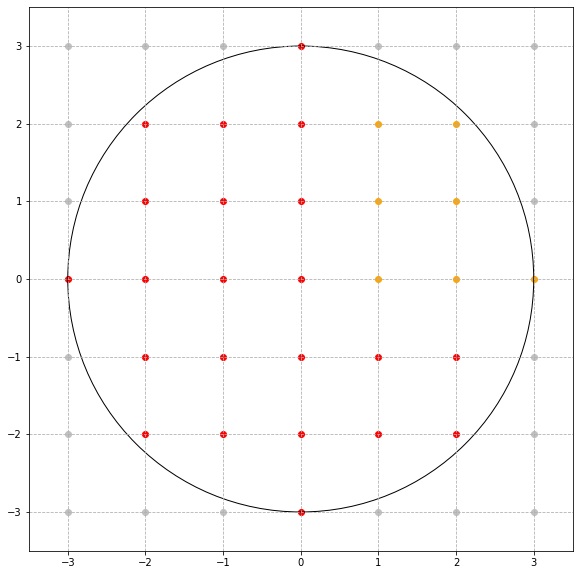

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(10, 10))

r = 3
circle = plt.Circle((0, 0), r, color='black', fill=False)
ax.add_artist(circle)

inner_lattice_points = []
outer_lattice_points = []
first_quarter_lattice_points = []
for i in range(-r, r + 1):
    for j in range(-r, r + 1):
        if i*i + j*j <= r*r:
            if i > 0 and j >= 0:
                first_quarter_lattice_points.append((i, j))
            else:
                inner_lattice_points.append((i, j))
        else:
            outer_lattice_points.append((i, j))

plt.scatter(*zip(*first_quarter_lattice_points), color='orange')
plt.scatter(*zip(*inner_lattice_points), color='red')
plt.scatter(*zip(*outer_lattice_points), color='silver')

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
plt.xlim([-r - 0.5, r + 0.5])
plt.ylim([-r - 0.5, r + 0.5])
ax.set_aspect(1.0)
plt.grid(which='both', linestyle='--')

plt.show()

W powyższego wykresu można zauważyć, że punkt kratowy należy do koła o promieniu $r$ jeżeli jego odległość od początku układu współrzędnych jest nie większa niż jego promień. Wobec tego zadanie szukania liczby punktów znajdujących się w kole sprowadza się do szukania punktów, które leżą odpowiednio blisko początku układu współrzędnych. Zanim jednak przejdę budowania algorytu poniżej podaję wzór na odległość $d(x, y)$ dwóch punktów $x=(x_1, x_2)$ i $y=(y_1, y_2)$ w dwuwymiarowej przestrzeni euklidesowej

$$d(x,y) = \sqrt{(x_1-y_1)^2 + (x2-y_2)^2}.$$

W naszym przypadku jeden z punktów, nie będzie to $y = (0, 0)$ jest początkiem układu współrzędnych, zatem powyższy wzór sprowadza się do

$$d(x,y) = \sqrt{(x_1-0)^2 + (x_2-0)^2} = \sqrt{x_1^2 + x_2^2}.$$

Zaś problem zadania sprowadza się do znalezienia wszystkich par $(x_1, x_2),$ gdzie $x_1, x_2$ są liczbami naturalnymi takich, że

$$\sqrt{x_1^2 + x_2^2} \leq r \Leftrightarrow x_1^2 + x_2^2 \leq r^2.$$

Warto jeszcze zwrócić uwagę że, nie ma potrzeby brać pod uwagę punktów, których jedna ze współrzędnych $x_1$ lub $x_2$ jest większa od $r$ ponieważ automatycznie powyższa nierówność nie będzie spełniona. Ponadto, jeżeli dobrze przyjrzałeś się wykresowi to zuważyłeś, że część punktów zaznaczyłem na pomarańczowo, są to punkty należące do pierwszej ćwiartki. Jak zapewne się już domyślasz wystarczy zliczyć tylko te punkty następnie liczbę tych punktów pomnożyć przez 4 (liczba ćwiartek) i dodać jeden (początek układu współrzędnych). Przejdę teraz do przedstawienia dwóch algorytmów.

<h4>Algorytm pierwszy (dwie pętle)</h4>

W celu wyznaczenia liczby punktów należących do pierwszej ćwiartki (punkty zaznaczone na pomarańczowo) możemy użyć zagnieżdzonej pentli. Pierwsza pętla będzie wykonywać się od 1 do $r$ i oznaczać będzie zmienną $x_1$, druga zaś od 0 do $r - 1$ i ocznaczać będzie zmienną $x_2$. Możecie zadać pytanie czemu druga pętla nie wykonuje się do $r$, wynika to z prostego powodu, gdyby druga zmienna wynosiła $r$ to pierwsza zmienna musiałaby wynosić 0 by punkt leżał w kole a tak się nie stanie bo pierwsza pętla zaczyna sie od 1. Poniżej przykładowa implementacja algorytmu.

In [2]:
from ipywidgets import interact, IntSlider

@interact(r=IntSlider(min=0, max=49, step=1, value=5))
def liczbaPunktowKratowychWKole(r):
    """Lczba punktów kratowych w kole o promieniu r i środu w początku układu współrzędnych."""
    liczba_punktow_w_cwiartce = 0
    for x_1 in range(1, r + 1):
        for x_2 in range(r + 1):
            if x_1*x_1 + x_2*x_2 <= r*r:
                liczba_punktow_w_cwiartce += 1
    
    return 4*liczba_punktow_w_cwiartce + 1

interactive(children=(IntSlider(value=5, description='r', max=49), Output()), _dom_classes=('widget-interact',…

<h4>Algorytm drugi (jedna pętla)</h4>

Pierwszy algorytm da się sprowadzić do wykonywania tylko jednej pętli. Ostatnie równanie, które wyprowadziłem można przekształcić do postaci

$$ x_2 <= \sqrt{r^2 - x_1^2}.$$

W związku z czym zamiast drugiej pętli można obliczyć liczbę współrzędnych $x_2$ spełniających powyższe rówanie dla danego $x_1$ i $r$, korzystając z wzoru

$$\lfloor\sqrt{r^2 - x_1^2}\rfloor + 1.$$

Wartość jeden bieże oznacza punkty leżące na osi x. Przejdźmy zatem do implementacji.

In [3]:
from math import sqrt, floor
from ipywidgets import interact, IntSlider

@interact(r=IntSlider(min=0, max=49, step=1, value=5))
def liczbaPunktowKratowychWKole(r):
    """Lczba punktów kratowych w kole o promieniu r i środu w początku układu współrzędnych."""
    liczba_punktow_w_cwiartce = 0
    for x_1 in range(1, r + 1):
        liczba_punktow_w_cwiartce += floor(sqrt(r*r - x_1*x_1)) + 1
    
    return 4*liczba_punktow_w_cwiartce + 1




interactive(children=(IntSlider(value=5, description='r', max=49), Output()), _dom_classes=('widget-interact',…

Rozważania na temat algorytmu można byłoby zakończyć na powyżych dwóch algorytmach jednak, czy oby na pewno? Ktoś może sobie zadań pytanie a może istnieje jawny wzór na liczbę punktów kratowych w kole, dzięki któremu nie trzeba wykonywać żadnych pętli? Niestety na dzień pisania tej notatki wydaje się, że nie ma takiego wzoru. Jedyne co da się poprawić w algorytmie drugim to pozbycię się funkcji pierwiastkowania. Po szczegóły odsyłam do [A000328](https://oeis.org/A000328). 

Przedstawię jeszcze na koniec wykres liczby punktów kratowych w kole w zależności od promiena $r$.

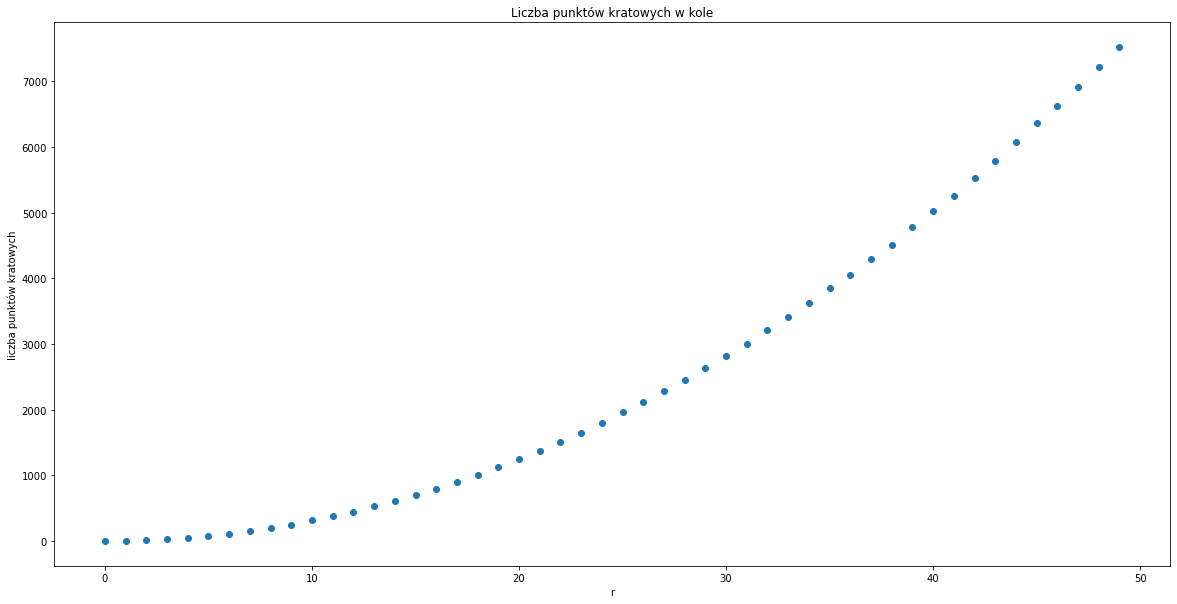

In [5]:
import numpy as np
import ipywidgets

fig, ax = plt.subplots(figsize=(20, 10))

max_r = 49
x = np.arange(0, max_r + 1, 1) # tworzy tablice [0, 1, 2, ..., 49]
vliczbaPunktowKratowychWKole = np.vectorize(liczbaPunktowKratowychWKole) # wektoryzuje wczesniej napisaną funkcję, by teraz mogła przyjmować tablicę argumentów
y = vliczbaPunktowKratowychWKole(x) # tworzy tablice [1, 5, 13, ..., 7525]

ax.set_title("Liczba punktów kratowych w kole")
ax.set_xlabel('r')
ax.set_ylabel('liczba punktów kratowych')
ax.scatter(x, y)
plt.show()
